In [2]:
# import packages
import os, sys, glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

from importlib import reload
from PIL import Image
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage import distance_transform_edt

sys.path.append('../')

import utils.DistanceMap as DistanceMap

In [3]:
# options
image_path = '../pennycress_pods/train/train_masks_by_pod/pods_early_600dpi_1.png'

wb = 10,
bwidth = 5


255 0
(454, 461, 3)
21.603973466135105 1.0


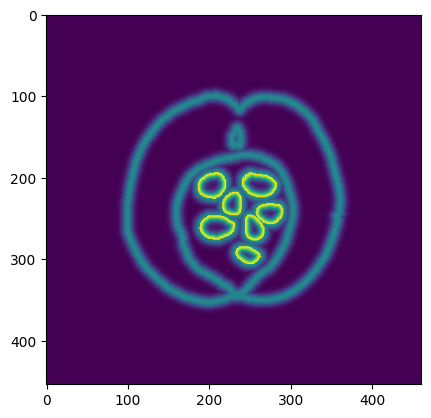

In [5]:
reload(DistanceMap)
image = Image.open(image_path)
image = np.uint8(np.array(image))
print(image.max(), image.min())

print(image.shape)

wc = {'wing': 1, 'env': 1, 'seed': 2}

w = DistanceMap.distance_map(image, wc, wb = 10, bwidth = 5)

plt.imshow(w)

print(w.max(), w.min())
